# Pyplot Tutorial

http://matplotlib.org/users/pyplot_tutorial.html

Matplotlib.pyplot est un ensemble de fonctions de style de commande qui rendent matplotlib fonctionnel comme MATLAB. Chaque fonction pyplot fait quelque changement à une figure: par exemple, crée une figure, crée une zone de traçage dans une figure, trace certaines lignes dans une zone de traçage, décorent le tracé avec des étiquettes, etc. Dans matplotlib.pyplot, différents états sont préservés à travers la fonction Appels, de sorte qu'il conserve la trace de choses comme la figure actuelle et la zone de traçage, et les fonctions de traçage sont dirigés vers les axes actuels (s'il vous plaît noter que "axes" ici et dans la plupart des endroits dans la documentation se réfère à la partie axes d'une figure Et non le terme mathématique strict pour plus d'un axe).

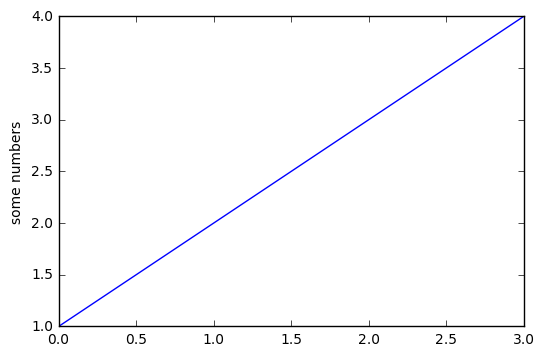

In [1]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4])
plt.ylabel('some numbers')
plt.show()

Vous vous demandez peut-être pourquoi l'axe des x varie de 0 à 3 et l'axe des y de 1 à 4. Si vous fournissez une seule liste ou tableau à la commande plot (), matplotlib suppose que c'est une séquence de valeurs y, et génère automatiquement les valeurs x pour vous. Puisque les gammes python commencent par 0, le vecteur x par défaut a la même longueur que y mais commence par 0. Par conséquent, les données x sont [0,1,2,3].
Plot () est une commande polyvalente, et prendra un nombre arbitraire d'arguments. Par exemple, pour tracer x contre y, vous pouvez exécuter la commande:

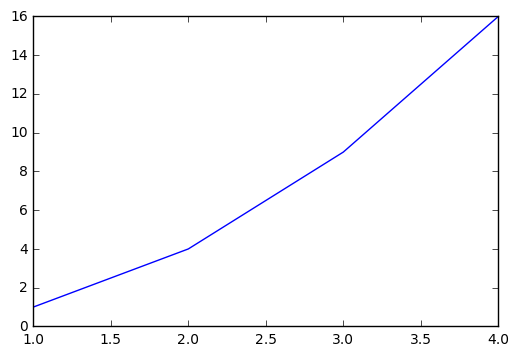

In [4]:
%matplotlib inline
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])

For every x, y pair of arguments, there is an optional third argument which is the format string that indicates the color and line type of the plot. The letters and symbols of the format string are from MATLAB, and you concatenate a color string with a line style string. The default format string is ‘b-‘, which is a solid blue line. For example, to plot the above with red circles, you would issue


Pour chaque x, y paire d'arguments, il y a un troisième argument facultatif qui est la chaîne de format qui indique la couleur et le type de ligne du tracé. Les lettres et les symboles de la chaîne de format sont de MATLAB, et vous concaténez une chaîne de couleur avec une chaîne de style de ligne. La chaîne de format par défaut est 'b-', qui est une ligne bleue pleine. Par exemple, pour tracer le dessus avec des cercles rouges :

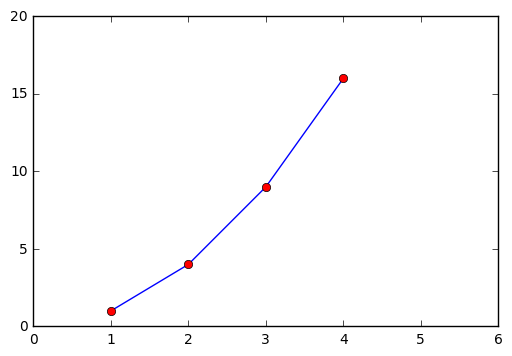

In [3]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4], [1,4,9,16], 'ro')
plt.axis([0, 6, 0, 20])
plt.show()

Consultez la documentation plot () pour obtenir une liste complète des styles de ligne et des chaînes de format. La commande axis () dans l'exemple ci-dessus prend une liste de [xmin, xmax, ymin, ymax] et spécifie la fenêtre des axes.

Si matplotlib était limité à travailler avec des listes, il serait assez inutile pour le traitement numérique. Généralement, vous utiliserez des tableaux numpy. En fait, toutes les séquences sont converties en matrices numpy en interne. L'exemple ci-dessous illustre un traçage de plusieurs lignes avec différents styles de format dans une commande à l'aide de tableaux.

[ 0.   0.2  0.4  0.6  0.8  1.   1.2  1.4  1.6  1.8  2.   2.2  2.4  2.6  2.8
  3.   3.2  3.4  3.6  3.8  4.   4.2  4.4  4.6  4.8]


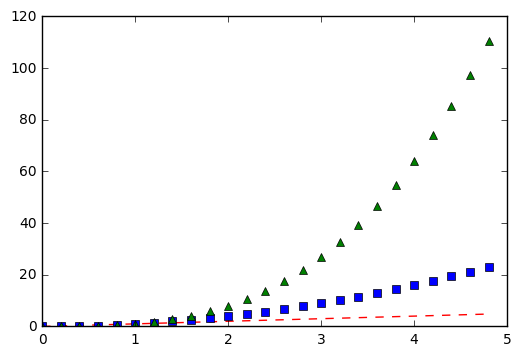

In [14]:
import numpy as np

t = np.arange(0., 5., 0.2)

print(t)

plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

## Utiliser les propriétés de ligne

Les lignes ont de nombreux attributs que vous pouvez définir: la largeur de ligne, style tiret, antialiased, etc; Voir matplotlib.lines.Line2D. Il existe plusieurs façons de définir les propriétés de ligne

En utilisant des mots-clés arguments

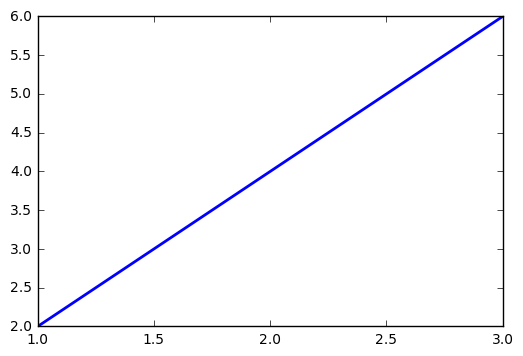

In [8]:
x = [1,2,3]
y = [2,4,6]
plt.plot(x, y, linewidth=2.0)


Utilisez les méthodes setter d'une instance Line2D. Plot renvoie une liste d'objets Line2D; Par exemple, ligne1, ligne2 = tracé (x1, y1, x2, y2). Dans le code ci-dessous nous supposerons que nous avons une seule ligne de sorte que la liste retournée est de longueur 1. Nous utilisons tuple déballage avec la ligne, pour obtenir le premier élément de cette liste:

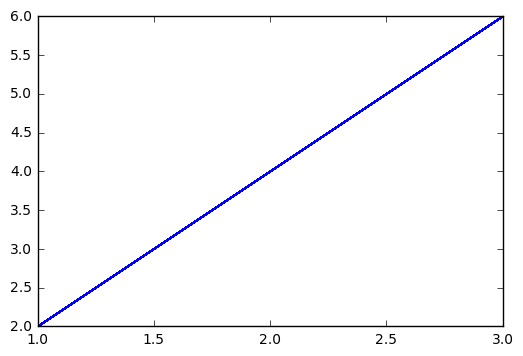

In [9]:
line, = plt.plot(x, y, '-')
line.set_antialiased(False) # turn off antialising


Utilisez la commande setp (). L'exemple ci-dessous utilise une commande MATLAB-style pour définir plusieurs propriétés sur une liste de lignes. Setp fonctionne de manière transparente avec une liste d'objets ou un seul objet. Vous pouvez soit utiliser des arguments de mots clés python, soit des paires string / value de type MATLAB:

[None, None, None, None]

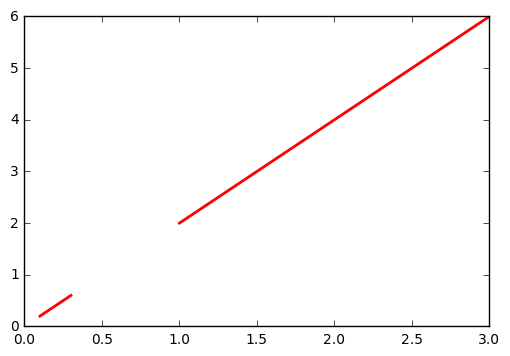

In [12]:
x2 = [0.1,0.2,0.3]
y2 = [0.2,0.4,0.6]


lines = plt.plot(x, y, x2, y2)
# use keyword args
plt.setp(lines, color='r', linewidth=2.0)
# or MATLAB style string value pairs
plt.setp(lines, 'color', 'r', 'linewidth', 2.0)

## Plusieurs axes et graphiques

MATLAB, et pyplot, ont le concept de la figure actuelle et les axes actuels. Toutes les commandes de traçage s'appliquent aux axes actuels. La fonction gca () renvoie les axes actuels (une instance matplotlib.axes.Axes), et gcf () renvoie la figure courante (instance matplotlib.figure.Figure). Normalement, vous n'avez pas à vous inquiéter à ce sujet, car il est tout pris en charge dans les coulisses. Ci-dessous un script pour créer deux sous-tracés.

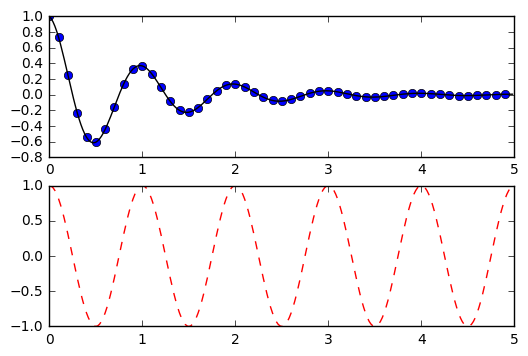

In [13]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure(1)
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()


La commande figure () est facultative car la figure (1) sera créée par défaut, tout comme une sous-figure (111) sera créée par défaut si vous ne spécifiez pas manuellement d'axes. La commande subplot () spécifie numrows, numcols, fignum où fignum varie de 1 à numrows * numcols. Les virgules de la sous-commande sont facultatives si numbres * numcols <1 0. Ainsi, la sous-figure (211) est identique à la sous-figure (2, 1, 1). Vous pouvez créer un nombre arbitraire de sous-tracés et d'axes. Si vous voulez placer un axe manuellement, c'est-à-dire pas sur une grille rectangulaire, utilisez la commande axis (), qui vous permet de spécifier l'emplacement en tant qu'axes ([left, bottom, width, height]) où toutes les valeurs sont fractionnaires (0 à 1). Voir pylab_examples exemple de code: axes_demo.py pour un exemple de placement manuel d'axes et pylab_examples exemple de code: subplots_demo.py pour un exemple avec beaucoup de sous-tracés.

Vous pouvez créer plusieurs figures en utilisant plusieurs chiffres () avec un numéro de chiffre croissant. Bien sûr, chaque figure peut contenir autant d'axes et de sous-traits que vous le désirez

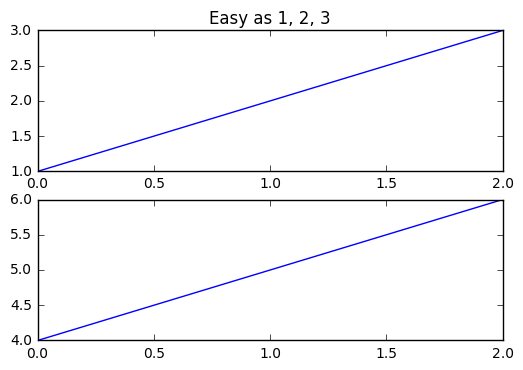

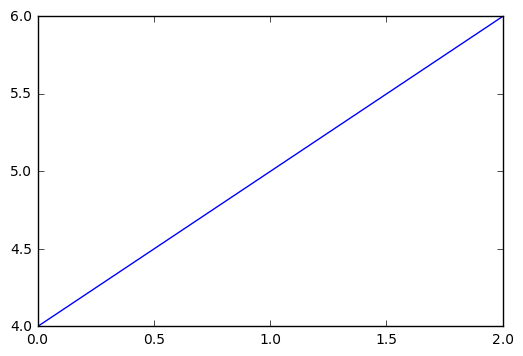

In [26]:
plt.figure(1)                # the first figure
plt.subplot(211)             # the first subplot in the first figure
plt.plot([1, 2, 3])
plt.subplot(212)             # the second subplot in the first figure
plt.plot([4, 5, 6])

plt.figure(2)                # a second figure
plt.plot([4, 5, 6])          # creates a subplot(111) by default

plt.figure(1)                # figure 1 current; subplot(212) still current
plt.subplot(211)             # make subplot(211) in figure1 current
plt.title('Easy as 1, 2, 3') # subplot 211 title


Vous pouvez effacer la figure actuelle avec clf () et les axes actuels avec cla (). Si vous trouvez ennuyeux que les états (en particulier l'image, la figure et les axes actuels) sont maintenus pour vous dans les coulisses, ne désespérez pas: il s'agit juste d'un wrapper autour d'une API orientée objet, que vous pouvez utiliser à la place Voir le didacticiel de l'artiste)

Si vous faites beaucoup de chiffres, vous devez être conscient d'une chose de plus: la mémoire requise pour une figure n'est pas complètement libérée jusqu'à ce que la figure soit explicitement fermée avec close (). Supprimer toutes les références à la figure et / ou utiliser le gestionnaire de fenêtres pour tuer la fenêtre dans laquelle la figure apparaît à l'écran, ne suffit pas, parce que pyplot maintient des références internes jusqu'à ce que close () soit appelé.

## Texte

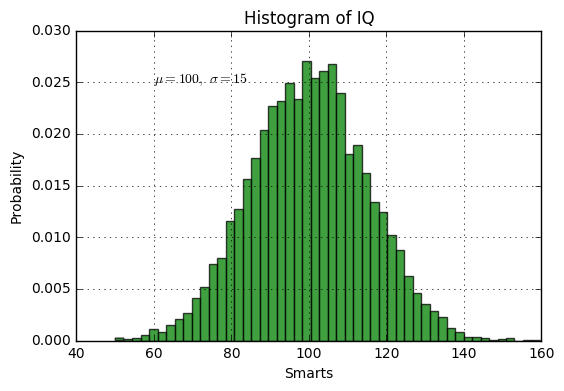

In [27]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, normed=1, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

Toutes les commandes text () renvoient une occurrence matplotlib.text.Text. Tout comme avec les lignes ci-dessus, vous pouvez personnaliser les propriétés en passant des arguments de mots clés dans les fonctions de texte ou en utilisant setp ():

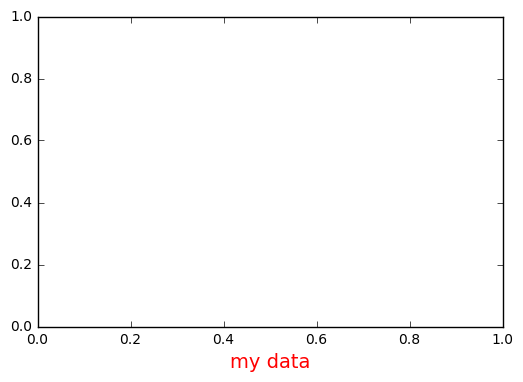

In [28]:
t = plt.xlabel('my data', fontsize=14, color='red')

### Expressions mathématiques dans du texte


Matplotlib accepte les expressions d'équation TeX dans n'importe quelle expression de texte. Par exemple, pour écrire l'expression dans le titre, vous pouvez écrire une expression TeX entourée de signes de dollar:

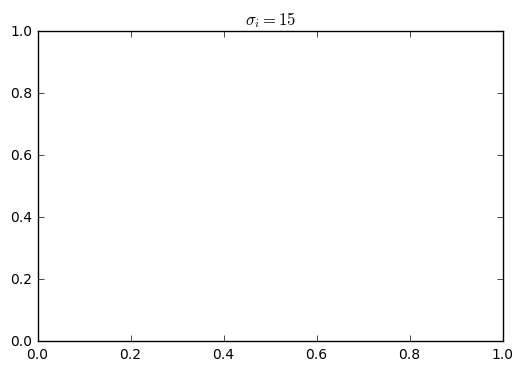

In [30]:
plt.title(r'$\sigma_i=15$')

Le r précédant la chaîne de titre est important - il signifie que la chaîne est une chaîne brute et ne pas traiter les backslashes comme python échappe. Matplotlib dispose d'un analyseur d'expression TeX intégré et d'un moteur de mise en page, et envoie ses propres polices mathématiques - pour plus de détails, voir Écrire des expressions mathématiques. Ainsi, vous pouvez utiliser du texte mathématique entre plates-formes sans avoir besoin d'une installation TeX. Pour ceux qui ont installé LaTeX et dvipng, vous pouvez également utiliser LaTeX pour formater votre texte et incorporer la sortie directement dans vos chiffres d'affichage ou postscript enregistré - voir Rendu texte avec LaTeX.

### Annotation


Les utilisations de la commande text () de base ci-dessus placent le texte à une position arbitraire sur les Axes. Une utilisation courante pour le texte est d'annoter une caractéristique du tracé, et la méthode annotate () fournit une fonctionnalité d'assistance pour faciliter les annotations. Dans une annotation, il ya deux points à considérer: l'emplacement étant annoté représenté par l'argument xy et l'emplacement du texte xytext. Ces deux arguments sont un tuple (x, y).

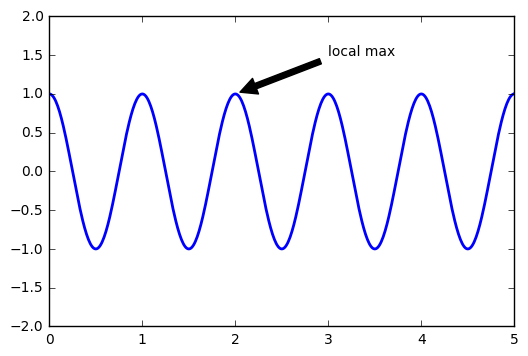

In [31]:
ax = plt.subplot(111)

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)

plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.ylim(-2,2)
plt.show()


Dans cet exemple de base, les positions xy (pointe de flèche) et xytexte (emplacement de texte) sont dans les coordonnées des données. Il existe une variété d'autres systèmes de coordonnées que l'on peut choisir - voir Annoter le texte et Annoter des axes pour plus de détails. Vous trouverez d'autres exemples dans pylab_examples exemple de code: annotation_demo.py.

### Axes logarithmiques et autre axes non linéaires


Matplotlib.pyplot supporte non seulement les échelles linéaires, mais aussi les échelles logarithmiques et logiques. Ceci est communément utilisé si les données couvrent de nombreux ordres de grandeur. Changer l'échelle d'un axe est facile:

Plt.xscale ('log')

Un exemple de quatre parcelles avec les mêmes données et différentes échelles pour l'axe y est illustré ci-dessous.

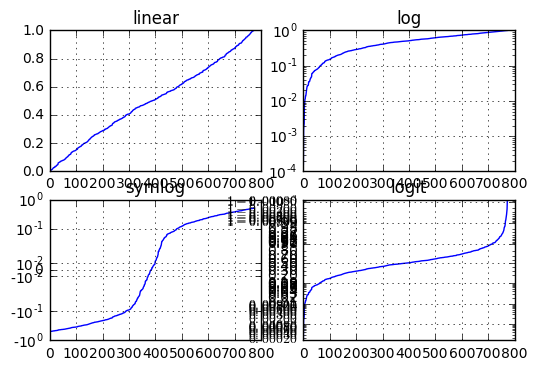

In [33]:
# make up some data in the interval ]0, 1[
y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))

# plot with various axes scales
plt.figure(1)

# linear
plt.subplot(221)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)


# log
plt.subplot(222)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)


# symmetric log
plt.subplot(223)
plt.plot(x, y - y.mean())
plt.yscale('symlog', linthreshy=0.05)
plt.title('symlog')
plt.grid(True)

# logit
plt.subplot(224)
plt.plot(x, y)
plt.yscale('logit')
plt.title('logit')
plt.grid(True)

plt.show()